In [2]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import seaborn as sns
import warnings
warnings.filterwarnings('once')
import matplotlib.pyplot as plt
from matplotlib import colors
from pylab import rcParams

## High Sedimentation Areas (Time Averaged)

Load the aggregated maxima of sedimentation results from a csv file. 





In [3]:
data = genfromtxt('data/ts_aggregated_data_spm_nechad2016.csv', delimiter=',')

### Plot Density and Aggregation Maps
Values are plotted using a log. scale. Areas with high values are red, with low or undefined values are blue.


(8007228,)
(3802721,)
4.991794093909493


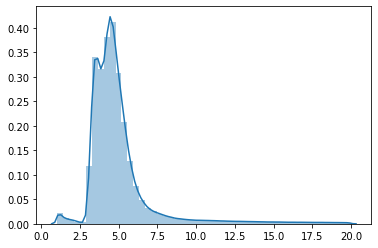

In [4]:
values = data.flatten()
print(values.shape)
values = values[~np.isnan(values)]
values = values[values>1]
values = values[values<20]
print(values.shape)
sns.distplot(values)
print(np.mean(values))

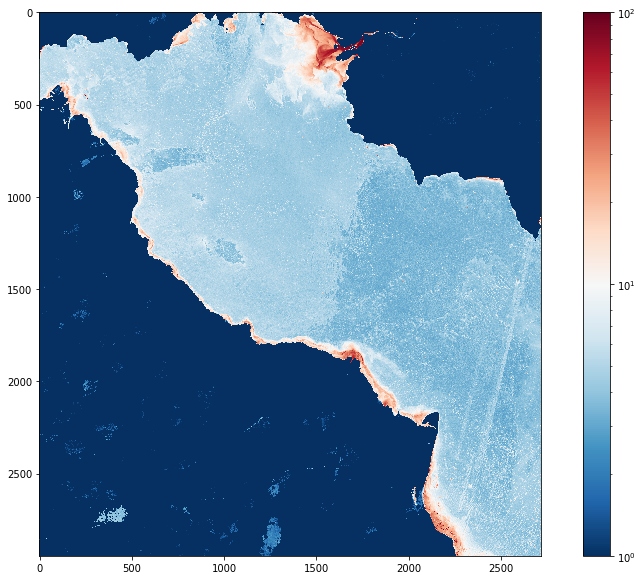

In [6]:
data[np.isnan(data)] = 1
data[data <= 0.1] = 1

rcParams['figure.figsize'] = 15, 10
fig = plt.imshow(data, norm=LogNorm(1, 100))
fig.set_cmap(plt.cm.RdBu_r)
plt.colorbar();

## Identified High Sedimentation Areas
Identified clusters of high sedimetatin areas are loaded and plotted.

In [7]:
indices = []
indices.append(genfromtxt('data/ts_indices_cluster_0_spm_nechad2016.csv', delimiter=',', dtype='int32'))
indices.append(genfromtxt('data/ts_indices_cluster_1_spm_nechad2016.csv', delimiter=',', dtype='int32'))
indices.append(genfromtxt('data/ts_indices_cluster_2_spm_nechad2016.csv', delimiter=',', dtype='int32'))

In [8]:
def to_grid(indices, shape):
    grid = np.zeros(shape)
    grid = grid
    for c, c_idx in enumerate(indices):
        for index in range(c_idx.shape[0]):
            i,j = c_idx[index]
            grid[i, j] = c+1
    return grid

## Overlay: High Sedimentation Areas (Time Averaged) with Identified Clusters
Three identified clusters are plotted in green, red and yellow over the area of interest.

In [9]:
grid = to_grid(indices, data.shape)
data = genfromtxt('data/ts_aggregated_data_spm_nechad2016.csv', delimiter=',')
data[np.isnan(data)] = 1

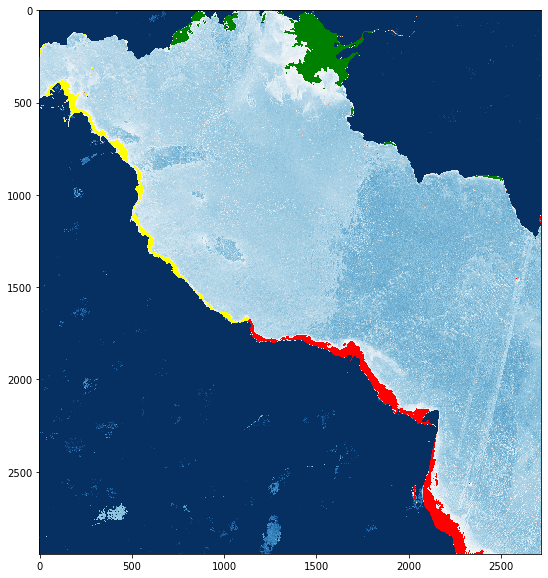

In [10]:
rcParams['figure.figsize'] = 15, 10

fig = plt.imshow(data,  cmap=plt.cm.RdBu_r, norm=LogNorm(1, 100))

cmap = colors.ListedColormap(['#FFFFFF00', 'green', 'red', 'yellow'])
bounds = [0, 1, 2, 3, 4]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(grid, cmap=cmap, norm=norm)


## Trend Analysis


In [11]:
def plot_clusters(indices):
    rcParams['figure.figsize'] = 5,4

    palette = ['red', 'green', 'blue']
    f, ax = plt.subplots(1)

    for c, c_idx in enumerate(indices):
        plt.scatter(c_idx[:, 1], c_idx[:, 0]*-1, s=5, c=palette[c], 
                    marker= '+', label='cluster' + ' ' + str(c+1))
    plt.axis('scaled')
    ax.legend()
    ax.set_title('Identified High Sedimentation Areas')

In [12]:
def read_cluster(path):
    df = pd.read_csv(path,  index_col=0, parse_dates=True)
    df.index.names = ['Date']
    df.sort_index(inplace=True)
    df = df[df.index > '2017-12-27']
    df['mean'] = df.mean(axis=1)
    df_new = df[['mean']].copy()
    df_new = df_new.fillna(method='ffill')
    return df_new 

In [13]:
df_c_0 = read_cluster('data/ts_df_cluster_0_spm_nechad2016.csv')
df_c_1 = read_cluster('data/ts_df_cluster_1_spm_nechad2016.csv') 
df_c_2 = read_cluster('data/ts_df_cluster_2_spm_nechad2016.csv') 

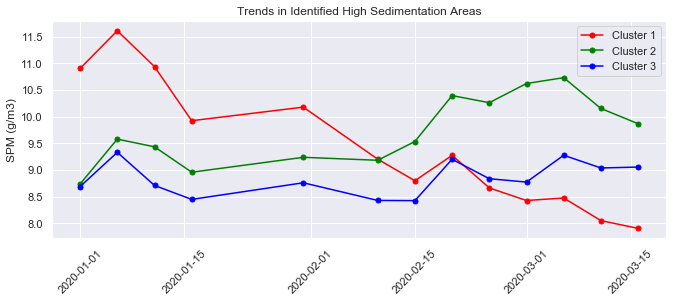

In [14]:
df_c_0_rolling = df_c_0[['mean']].rolling(10, center=True).mean()
df_c_1_rolling = df_c_1[['mean']].rolling(10, center=True).mean()
df_c_2_rolling = df_c_2[['mean']].rolling(10, center=True).mean()

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(df_c_0_rolling, marker='o', markersize=5, linestyle='-', label='Cluster 1', color='red' )
ax.plot(df_c_1_rolling, marker='o', markersize=5, linestyle='-', label='Cluster 2', color='green')
ax.plot(df_c_2_rolling, marker='o', markersize=5, linestyle='-', label='Cluster 3', color='blue')


ax.set_ylabel('SPM (g/m3)')
ax.legend()
ax.set_title('Trends in Identified High Sedimentation Areas');

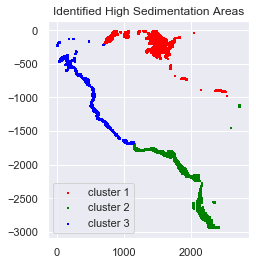

In [15]:
plot_clusters(indices)